# Oscilador Armónico Cuántico

El sistema es una partícula que se mueve en un potencial dado por

$$
V = \frac{1}{2} kx^2
$$

donde $k$ es una constante. 

```{note}
En mecánica clásica podemos encontrar sistemas con este potencial como los resortes, mientras que en química cuántica esto sirve para modelar la vibración de los enlaces.
```

En este caso, el Hamiltoniano contiene la energía cinética y el potencial

$$
H = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{1}{2} kx^2
$$

y la ecuación de Schrödinger a resolver es

$$
\left(-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{1}{2} kx^2 \right) \psi = E \psi
$$

esta es una ecuación cuyas soluciones a la energía y las eigenfunciones son

$$
E_n = \left(n + \frac{1}{2}\right) h \nu
$$

$$
\psi_n = N_n H_n(\alpha x) e^{-\alpha^2x^2/2}
$$

aquí $n$ es un número cuántico tal que $n = 0,1,2,3,...$, y los términos $N_n$ y $\alpha$ están dados por

$$
N_n = \left(\frac{\alpha}{2^n n! \pi^{1/2}} \right)^{1/2}
$$

$$
\alpha = \left( \frac{mk}{\hbar^2} \right)^{1/4}
$$

$H_n(x)$ son los polinomios de Hermite

|$n$|$H_n(x)$|
|-|-|
|0|$1$|
|1|$2x$|
|2|$4x^2 -2$|
|3|$8x^3 - 12 x$|
|4|$16x^4 - 48 x^2 +12$|

## Gráficas de las eigenfunciones

**Importe las librerías numpy, math, pyplot de matplotlib y eval_hermite de scipy.special** 

In [1]:
# Importe librerías

In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.special import eval_hermite

**Asigne valores a las constantes $m$, $k$, $\hbar$, $h$, $\alpha$. Considere $m=1$, $k=1$, $\hbar=1$.**

In [3]:
# Asigne valores

In [4]:
m=1.0
k=1.0
hbar=1.0
h = hbar*2*np.pi

alpha = np.power(m*k/(hbar**2),1/4)

**Defina un dominio de puntos para x, por ejemplo $1000$ puntos de $-5$ a $5$.**

In [5]:
# Defina dominio

In [6]:
x = np.linspace(-5,5,1000)

**Grafique la eigenfunción del oscilador Harmónico cuántico y su cuadrado para $n=0,2,4$.**

Compare con Atkins, P. W.; Friedman, R. Molecular Quantum Mechanics, 4th ed.; Oxford University Press: New York, 2005, p.62.

In [7]:
# Gráfica

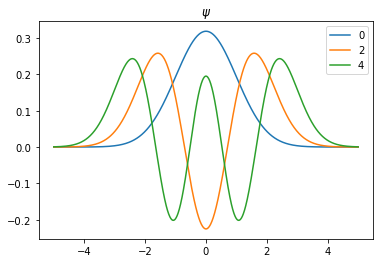

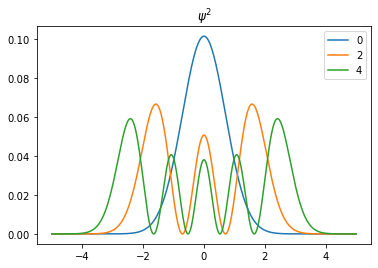

In [8]:
#Psi
for n in range(0,5,2):
    N_n = np.sqrt(alpha/(2**n*math.factorial(n)*np.pi**2))
    H_n = eval_hermite(n,alpha*x)
    psi_n = N_n*H_n*np.exp(-alpha**2*x**2/2)
    plt.plot(x,psi_n,label=n)
plt.legend()
plt.title("$\psi$")
plt.show()

#Psi^2
for n in range(0,5,2):
    N_n = np.sqrt(alpha/(2.0**n*math.factorial(n)*np.pi**2))
    H_n = eval_hermite(n,alpha*x)
    psi_n = N_n*H_n*np.exp(-alpha**2*x**2/2)
    plt.plot(x,psi_n**2,label=n)
plt.legend()
plt.title("$\psi^2$")
plt.show()

**Grafique la eigenfunción del oscilador Harmónico cuántico para $n=1,3,5$.**

Compare con Atkins, P. W.; Friedman, R. Molecular Quantum Mechanics, 4th ed.; Oxford University Press: New York, 2005, p.62.

In [9]:
# Gráfica

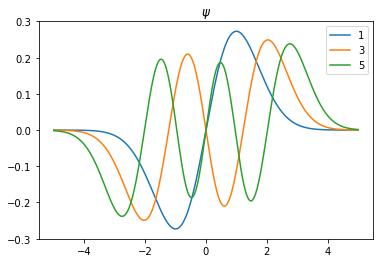

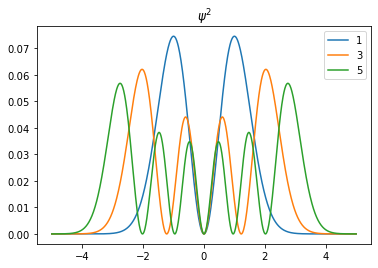

In [10]:
#Psi
for n in range(1,6,2):
    N_n = np.sqrt(alpha/(2**n*math.factorial(n)*np.pi**2))
    H_n = eval_hermite(n,alpha*x)
    psi_n = N_n*H_n*np.exp(-alpha**2*x**2/2)
    plt.plot(x,psi_n,label=n)
plt.legend()
plt.title("$\psi$")
plt.show()

#Psi^2
for n in range(1,6,2):
    N_n = np.sqrt(alpha/(2**n*math.factorial(n)*np.pi**2))
    H_n = eval_hermite(n,alpha*x)
    psi_n = N_n*H_n*np.exp(-alpha**2*x**2/2)
    plt.plot(x,psi_n**2,label=n)
plt.legend()
plt.title("$\psi^2$")
plt.show()

## Valores Esperados

A continuación calcularemos valores esperados correspondientes al estado basal. **Para ello importe el módulo de integración de scipy.**

In [11]:
# Improte integrate de scipy

In [12]:
from scipy import integrate

$$\newcommand{\expval}[1]{\left\langle{#1}\right\rangle}$$

**Calcule el valor esperado de la posición, es decir, realice la integral**
\begin{equation*}
\expval{x} = \int_{-\infty}^{\infty} \psi^* x \psi dx
\end{equation*}

In [13]:
# Realice la integral

In [14]:
n = 0
N_n = np.sqrt(alpha/(2**n*math.factorial(n)*np.pi**2))

integrate.quad(lambda x: N_n*eval_hermite(n,alpha*x)*np.exp(-alpha**2*x**2/2) * (x) * N_n*eval_hermite(n,alpha*x)*np.exp(-alpha**2*x**2/2),-np.inf,np.inf)[0]

0.0

**Calcule el valor esperado del cuadrado de la posición, es decir, realice la integral**
\begin{equation*}
\expval{x^2} = \int_{-\infty}^{\infty} \psi^* x^2 \psi dx
\end{equation*}

In [15]:
# Realice la integral

In [16]:
n = 0
N_n = np.sqrt(alpha/(2**n*math.factorial(n)*np.pi**2))

integrate.quad(lambda x: N_n*eval_hermite(n,alpha*x)*np.exp(-alpha**2*x**2/2) * (x**2) * N_n*eval_hermite(n,alpha*x)*np.exp(-alpha**2*x**2/2),-np.inf,np.inf)[0]

0.0897935610625835

```{admonition} Pregunta
:class: note

Considere los siguientes hechos:
- La raíz de la desviación cuadrática media de la posición está dada por:
\begin{equation*}
    \Delta x = \sqrt{\expval{x^2} - \expval{x}^2}
\end{equation*}
- Considere que para este sistema $\expval{x}=0$, y que la desviación cuadrática media del momento lineal tiene un valor finito mayor a cero, $\Delta p_x>0$.
¿Por qué $\expval{x^2}$ no puede ser cero en ningún caso?

**Ayuda.** Revise el principio de incertidumbre y el producto $\Delta x \Delta p_x$.
```

```{admonition} Respuesta
:class: note
:class: dropdown

El principio de incertidumbre establece la restricción
\begin{equation*}
\Delta x \Delta p_x \geq \frac{1}{2}\hbar
\end{equation*}

Por lo tanto, si $\Delta p_x$ tiene un valor finito, entonces $\Delta x$ no puede ser cero o se rompería el principio variacional. Ya que $\expval{x}=0$, entonces el valor de $\Delta x = \sqrt{\expval{x^2} - \expval{x}^2}$ está únicamente determinado por $\expval{x^2}$ que, por tanto, tampoco puede ser cero.
```

## Referencias

 - T.J. Zielinski, Exploring the Harmonic Oscillator Wave Functions, J. Chem. Educ. 84, 1232 (2007).
 - J.J. Bruce y B.D. Anderson, Investigating the harmonic oscillator using Mathematica, J. Chem. Educ. 70, A122 (1993).
 - P. W. Atkins, y R. Friedman, Molecular Quantum Mechanics (Oxford University Press, 2005).